# Week 6 (Exercises)

## Exercise 6 & 30 from chapter 3

In [155]:
import pandas as pd
import numpy as np
import nltk
import re
from tqdm import tqdm

### Exercise 6
* Describe the class of strings matched by the following regular expressions.

a) [a-zA-Z]+
<br>
b) [A-Z][a-z]*
<br>
c) p[aeiou]{,2}t
<br>
d) \d+(\.\d+)?
<br>
e) ([^aeiou][aeiou][^aeiou])*
<br>
f) \w+|[^\w\s]+

Test your answers using nltk.re_show().

A) The string that mathes this particular regex patterns are strings containing lower case and upper case letters with an arbitary length due to the plus operator which states one or more previous

In [22]:
word = 'aaaAAA'
re.findall(r'[a-zA-Z]+', word)

['aaaAAA']

In [19]:
word = 'AAAAaaaaA'
re.findall(r'[A-Z][a-z]*', word)

['A', 'A', 'A', 'Aaaaa', 'A']

B) The above regex pattern mathes strings that has capital letters and then it also matches capital letters followed by a lower case letter, then the Kleene Closure operator ensures that we also get mathces where an uppercase letter is followed by multiple lower case letters.

word = 'Hej med dig'
re.findall(r'[A-Z][a-z]*', word)

Finds words that starts with an upper case or just upper case letters.

C) Finds words that starts with a p and is then followed by two or less vowels from the set {aeiou} and ends with an t.

In [38]:
word = 'paat'
re.findall(r'p[aeiou]{,2}t', word)

['paat']

D) It provides the fraction of real numbers

In [64]:
word = '100.001'
re.findall(r'\d+(.\d+)?', word)

['-12', '']

E) The string that mathces this regex search is a consonant followed by a vowel and then a consonant, then the Kleene closure operator is used saying zero or more of previous, which in this case is the sequence stated.

In [70]:
word = 'kak'
re.findall(r'([^aeiou][aeiou][^aeiou])*', word ) 

['kak', '']

F) It finds all possible character strings or number strings, could be promising for tokenization purposes, given that it would seperate words and numbers into seperate tokens.

In [81]:
word = 'Jeg boede på lindegårdsvej nr 16' 
tokens = re.findall(r'\w+|[^\w\s]+', word ) 

## Exercise 30
◑ Use the Porter Stemmer to normalize some tokenized text, calling the stemmer on each word. Do the same thing with the Lancaster Stemmer and see if you observe any differences

In [ ]:
from nltk import word_tokenize
raw = """DENNIS: Listen, strange women lying in ponds distributing swords
... is no basis for a system of government.  Supreme executive power derives from
... a mandate from the masses, not from some farcical aquatic ceremony."""
tokens = word_tokenize(raw)

porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()
print([porter.stem(t) for t in tokens])
print('\n')
print([lancaster.stem(t) for t in tokens])

The most noticable difference is that the porter stemmer manage to change lying to lie instead of just removing the end. The lanchester stemmer also stems listen to list, which essentially changes the meaning of the word entirely. 

# Prelude to part 2 - Data

Importing reddit submissions from wallstreetbets posted within January 1st and December 31st 2020 with content in English. 

In [163]:
submissions = pd.read_csv("wallstreet_subs.csv", sep=',')
submissions

,created_utc,title,selftext,score
0,1586173811,What is the Fed actually buying?,"Okay, I may actually just be retarded. On my d...",1
1,1586173320,I didn’t learn about puts because I was lazy,"Beginning of the this virus shit, everyone was...",1
2,1586173268,HOT TAKE,Literally everyone has free time on their hand...,1
3,1586172639,Fuck you Gordon,"Gordon I believed in you, I can't even begin t...",1
4,1586171822,Can’t find a picture,Someone uploaded a ohoto of the stock market h...,1
...,...,...,...,...
82237,1602007302,Hurricane Delta (BECN) 🔥,\nHurricane Delta is looking like it is going ...,1
82238,1602006818,Made 40k on Nike. Next play? CROCS motherfucker,# 1. Introduction\n\n[Proof that I'm lucky](h...,1
82239,1602006029,"Please screenshot the whole timeline, not just...",I could nut over your retarded failures just f...,1
82240,1602005968,What is your price target for Tesla in 40 years?,I am 26 and currently max out my roth each yea...,1


# Part 2 - Words that characterize stocks discussed on r/wallstreetbets

Exercise 2: Most discussed stocks in r/wallstreebets. GME is only one among many stocks people have discussed in r/wallstreetbets. In this exercise, we will find the most discussed stocks on wallstreetbets. Stocks are identified by their Ticker symbol. A Ticker symbol is nothing but a string consisting of letters and numbers, and is typically quite short. For example the Gamestop symbol is GME, Amazon is AMZN, Alphabet is GOOGL...

1) Regex pattern to find words starting with a $

In [90]:
word = 'I fucking love this $GME stuff'
re.findall(r'\$\w+', word)

['$GME']

In [91]:
word = 'I fucking love this $AMZN stuff'
re.findall(r'\$[a-zA-Z]+', word)

['$AMZN']

2) Load the wallstreetbets submission dataset as a Pandas DataFrame and create a new column containing both the title and the textual content of each submission (as one long string). We refer to this as the text of the submission.

In [164]:
submissions['text'] = submissions['title'] + ' ' + submissions['selftext']
submissions

,created_utc,title,selftext,score,text
0,1586173811,What is the Fed actually buying?,"Okay, I may actually just be retarded. On my d...",1,"What is the Fed actually buying? Okay, I may a..."
1,1586173320,I didn’t learn about puts because I was lazy,"Beginning of the this virus shit, everyone was...",1,I didn’t learn about puts because I was lazy B...
2,1586173268,HOT TAKE,Literally everyone has free time on their hand...,1,HOT TAKE Literally everyone has free time on t...
3,1586172639,Fuck you Gordon,"Gordon I believed in you, I can't even begin t...",1,"Fuck you Gordon Gordon I believed in you, I ca..."
4,1586171822,Can’t find a picture,Someone uploaded a ohoto of the stock market h...,1,Can’t find a picture Someone uploaded a ohoto ...
...,...,...,...,...,...
82237,1602007302,Hurricane Delta (BECN) 🔥,\nHurricane Delta is looking like it is going ...,1,Hurricane Delta (BECN) 🔥 \nHurricane Delta is ...
82238,1602006818,Made 40k on Nike. Next play? CROCS motherfucker,# 1. Introduction\n\n[Proof that I'm lucky](h...,1,Made 40k on Nike. Next play? CROCS motherfucke...
82239,1602006029,"Please screenshot the whole timeline, not just...",I could nut over your retarded failures just f...,1,"Please screenshot the whole timeline, not just..."
82240,1602005968,What is your price target for Tesla in 40 years?,I am 26 and currently max out my roth each yea...,1,What is your price target for Tesla in 40 year...


3) For each submission, find all ticker symbols (those preceded by a dollar sign) contained in the text. Use the function re.findall, and the regular expression you created in point 1). Some tips for success:
* Remove matches that are definetly not stock symbols
* Convert all matches to uppercase
* Remove the dollar sign at the beginning of the symbol (e.g. $gme → GME).

In [165]:
def get_ticker(word: str)->list:
    return re.findall(r'\$[a-zA-Z]+', word)

In [176]:
submissions['ticker'] = submissions["text"].map(get_ticker)

In [177]:
print(f'Initial number of submissions using ticker before filtering: {len(submissions[submissions.ticker.astype(bool)])}')

Initial number of submissions using ticker before filtering: 9042


In [178]:
for i in tqdm(range(len(submissions))):
    ticker_list = submissions.iloc[i, :]['ticker']
    temp = []
    for j in ticker_list:
        temp.append(re.sub(r'\$', '', j).upper())
    submissions['ticker'][i] = temp

  0%|                                                                                                        | 0/82242 [00:00<?, ?it/s]/var/folders/w8/wb7dt4yd6ys326nsmh5q64200000gn/T/ipykernel_3059/2320377718.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submissions['ticker'][i] = temp
100%|███████████████████████████████████████████████████████████████████████████████████████████| 82242/82242 [01:24<00:00, 974.38it/s]


In [179]:
submissions.iloc[100,:]

created_utc                                           1586099062
title          Stop betting against SPY, start betting agains...
selftext       fellow autists, I know I'm not the only retard...
score                                                          1
text           Stop betting against SPY, start betting agains...
ticker         [AMD, SPY, IWM, SPY, IWM, SPX, IWM, SPY, AMD, ...
Name: 100, dtype: object

In [181]:
#Trying to validate the approach by looking at the unique tickers
(list(set([a for b in submissions.ticker.tolist() for a in b])))

['SINA',
 'CVLB',
 'IVZ',
 'ANF',
 'SCWX',
 'HYLN',
 'LW',
 'ARGT',
 'UHS',
 'TSLA',
 'TRAIN',
 'AEIS',
 'ONEM',
 'LGIQ',
 'GUN',
 'MAR',
 'ZTS',
 'NJ',
 'COG',
 'CVNA',
 'LNC',
 'ZBRA',
 'COF',
 'GOV',
 'DNB',
 'HNTI',
 'SSW',
 'CHEWY',
 'SCISSORS',
 'VSAT',
 'OSW',
 'HUMAN',
 'TENDIES',
 'MA',
 'SUPERBOWL',
 'API',
 'APD',
 'SONOS',
 'HRTX',
 'DAO',
 'RL',
 'AZUL',
 'FUJIY',
 'KALU',
 'CAJ',
 'SILV',
 'TFX',
 'SYNH',
 'EWI',
 'BMRG',
 'ROPE',
 'HRC',
 'BEER',
 'SAM',
 'XAUUSD',
 'LOGI',
 'SMFG',
 'ZNGA',
 'GES',
 'OJ',
 'MLHR',
 'ET',
 'MDGL',
 'JNUG',
 'MKC',
 'WKSP',
 'CTB',
 'LVMH',
 'NAVI',
 'DMYT',
 'HORTING',
 'SBNY',
 'AMKR',
 'SPXU',
 'WRTC',
 'JETS',
 'NUR',
 'FAMILY',
 'OAS',
 'GRAFTECH',
 'MRS',
 'ONB',
 'TXMD',
 'SHITFIX',
 'SMAR',
 'NIKL',
 'BASED',
 'UPWK',
 'AEMD',
 'LRN',
 'PUMP',
 'DRIP',
 'CHH',
 'JNSH',
 'DUST',
 'EGRX',
 'TDOC',
 'OCGN',
 'FXI',
 'GAN',
 'AUY',
 'HTSC',
 'PROV',
 'PUSH',
 'IPBO',
 'POPE',
 'FXX',
 'SEAS',
 'SLQT',
 'NTDOY',
 'ISR',
 'BBAM',
 'DB',

By a quick inspection of the above results, it becomes evident that our current approach finds all words which start with an $, which also assemble common words. Examples which can be found in the above is words such as POPCORN, SUPERBOWL etc.

4) Create a list containing the top 15 Ticker Symbols by number of occurrences. GME should be among them. If it is not, check again your analysis and/or come talk to me. Google the top 15 symbols and find the corresponding company names. Are they known companies or not?

In [183]:
fdist2 = nltk.FreqDist((list([a for b in submissions.ticker.tolist() for a in b])))
fdist2.most_common(15)

[('SPY', 1150),
 ('TSLA', 988),
 ('SPCE', 562),
 ('PLTR', 394),
 ('MSFT', 377),
 ('ROPE', 359),
 ('AAPL', 243),
 ('AMZN', 230),
 ('NIO', 228),
 ('ZM', 227),
 ('AMD', 212),
 ('BABA', 207),
 ('GME', 202),
 ('DIS', 169),
 ('BA', 164)]

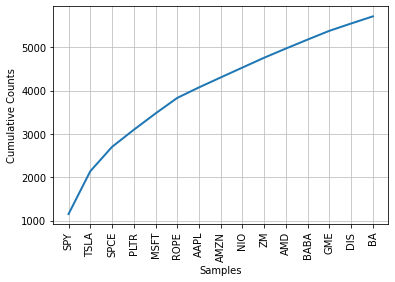

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [186]:
fdist2.plot(15, cumulative=True)

## Exercise 3: TF-IDF and the stocks discussed on r/wallstreetbets. 
The goal for this exercise is to find the words charachterizing each of the stocks discussed on r/wallstreetbets. We will focus on the top 15 stocks we idenfied in Exercise 2, and we will of course use TF-IDF.

First, check out the wikipedia page for TF-IDF. Explain in your own words the point of TF-IDF.
* What does TF stand for?
TF stands for term-frequency and essentially how frequent a token occurs in a document.
<br>
* What does IDF stand for?
<br>
IDF stands for inverse document frequence, which is the inverse of how often a token occurs in the corpora. 


Tokenize the text of each submission. Create a column tokens in your dataframe containing the tokens. Remember the bullets below for success.
* If you dont' know what tokenization means, go back and read Chapter 3 again. The advice to go back and check Chapter 3 is valid for every cleaning step below.
* Exclude punctuation.
* Exclude URLs
* Exclude stop words (if you don't know what stop words are, go back and read NLPP1e again).
* Exclude numbers (since they're difficult to interpret in the word cloud).
* Set everything to lower case.
* Note that none of the above has to be perfect. And there's some room for improvisation. You can try using stemming. In my own first run the results didn't look so nice, because some submissions repeat certain words again and again and again, whereas other are very short. For that reason, I decided to use the unique set of words from each submission rather than each word in proportion to how it's actually used. Choices like that are up to you.

In [194]:
from tqdm import tqdm, tqdm_pandas
tqdm_pandas(tqdm())

0it [00:00, ?it/s]


In [200]:
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    #Removing urls
    text = re.sub(r'http\S+', '', text)
    #Tokenize using nltk
    word_tokens = word_tokenize(text.lower())
    #removing none letter characters and stop words
    filtered_sentence = [w for w in word_tokens if w not in stop_words and w.isalpha()]
    #Conduct stemming
    processed_text = [porter.stem(t) for t in filtered_sentence]
    return processed_text
    
submissions['tokens'] = submissions['text'].progress_apply(lambda x: preprocess(x))


100%|███████████████████████████████████████████████████████████████████████████████████████████| 82242/82242 [03:36<00:00, 380.74it/s]


3) Find submissions discussing at least one of the top 15 stocks you identified above. To do so:
* Create a function that finds the intersection between a list of tokens and your list of top 15 stocks. For example, your function applied to the tokens: "[Here, TSLA, submission, GME]" should return ["TSLA","GME"]. (Optional: you can also try to included cases in which the list of tokens contains a company name among your top 15. For example the function applied to "[Here, Gamestop, submission]" could return ['GME'].)
* Create a new column stock in your DataFrame, containing the output of your function applied to the text column. Values in this column should be lists.
* Handle cases where one post discusses more than one stock by applying the function explode to the stock column. This will duplicate submissions associated to multiple stocks. After exploding, the values included in the stock column should be strings.
* Handle cases where none of the selected stocks is discussed by replacing Nan values, for example with "Other".

In [ ]:
top15_map = {
 'tesla': 'TSLA',
 'virgingalactic': 'SPCE',
 'palantir': 'PLTR',
 'microsoft': 'MSFT',
 'tesla':'TSLA',
 'amazon':'AMZN',
 'zoom':'ZM',
 'alibaba':'BABA':,
 'gamestop':'GME',
 'disney':'DIS',
 'boeing':'BA'   
}

fdist2 = nltk.FreqDist((list([a for b in submissions.ticker.tolist() for a in b])))
top15 = fdist2.most_common(15).keys()
print(top15)
def inter_top_stock(tokens):
    
    return list(set(tokens) & set(top15))

submissions['inter_top15'] = submissions['tokens'].apply(lambda x: inter_top_stock(x))
